In [1]:
import numpy as np
import simtk.unit as unit
import matplotlib.pyplot as plt
import openmolecularsystems as oms

# Predicción de la termodinámica desde la mecánica estadística

En el argot de la mecánica estadística, los procesos estocásticos, y la simulación de dinámica molecular, hablamos de termodinámica cuando nos referimos al conjunto de observables que no depende del tiempo. Por ejemplo, la distancia promedio entre dos átomos, la probabilidad de que se forme un puente de hidrógeno entre una cadena lateral y una molécula de agua o la constante de disociación de un ligando y un receptor. No quiere decir que dicha distancia, dicho puente de hidrógeno o dicho complejo receptor-ligando, no vaya a variar con el tiempo. De hecho lo hacen. Pero los observables a los que nos estamos refiriendo tienen un valor no relacionado con el tiempo. De hecho si el universo en el que medimos tiene una población lo suficentemente grande de sistemas (infinito, en teoría), podemos realizar una medida instantaneamente y obtener el valor de estos observables de la medida tomada a toda la población. Ésta sera igual que la que obtendremos de observar un único sistema durante un tiempo suficientemente largo (infinito, en teoría). Sabemos por lo tanto que la capacidad de medir estos observables no depende de cuantas veces midamos a durante cuanto tiempo. La precisión o la fiabilidad del valor obtenido si depende, pero la capacidad de medirlos no. Un ejemplo de observables que dependen del tiempo serían el tiempo de vida media del puente de hidrógeno, la constante de difusión de la molécula de agua o la constante cinética de formación o ruptura del complejo recetor-ligando. Cuando nos referimos a estos últimos observables estamos hablando de cinética, no de termodinámica. Y en este caso la capacidad de medirlos si depende de cuando medimos y durante cuanto tiempo.

Para entender a continuación qué tiene que ver la termodinámica con el valor esperado de una distancia entre átomos tomemos como ejemplo nuestro doble pozo con los parámetros usados en las unidades anteriores.

\begin{equation}
V(x,y,z)=E_{0}\left[ \left(\frac{x}{a}\right)^4 -2\left(\frac{x}{a}\right)^2 \right]-\frac{b}{a}x + \frac{1}{2}k\left( y^2 + z^2 \right)
\end{equation}

In [2]:
# Sistema
mass = 35.453 * unit.amu

# Potential externo
Eo = 3.0 * unit.kilocalories_per_mole
a = 0.5 * unit.nanometers
b = 0.5 * unit.kilocalories_per_mole
k = 1.0*unit.kilocalories_per_mole/unit.angstrom**2

# Estado termodinámico
temperature=300.0*unit.kelvin

In [3]:
osystem = oms.DoubleWell(mass=mass, Eo=Eo, a=a, b=b, k=k)

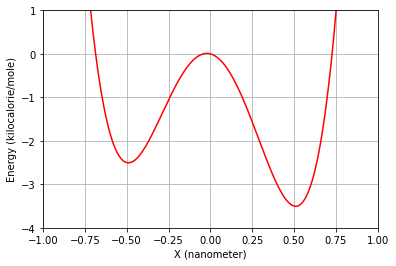

In [4]:
xyz_serie = np.zeros([200,3]) * unit.nanometers
xyz_serie[:,0] = np.linspace(-1.0, 1.0, num=200) * unit.nanometers

potential = osystem.evaluate_potential(xyz_serie)

plt.plot(xyz_serie[:,0], potential, 'r-')
plt.ylim(-4,1)
plt.xlim(-1,1)
plt.grid()
plt.xlabel("X ({})".format(unit.nanometers))
plt.ylabel("Energy ({})".format(unit.kilocalories_per_mole))
plt.show()

Se puede demostrar que la probabilidad de que un sistema molecular visite un estado de su espacio de fases -el espacio de posiciones y velocidades-, determinado por las posiciones y velocidades de todos sus átomos, está pesada por -es proporcional a- el peso de Boltzmann o función de partición:

\begin{equation}
z(\vec{r},\vec{v}) = e^{-\frac{1}{K_{B}T} U(\vec{r},\vec{v})}
\end{equation}

Donde $K_{B}$ es una constante -la constante de Boltzmann-, $T$ es la temperatura, y $U(\vec{r},\vec{v})$ es la energía total del sistema en dicho estado (la energía expresada por el Hamiltoniano):

\begin{equation}
U(\vec{r},\vec{v}) = V(\vec{r}) + T(\vec{v})
\end{equation}

donde el término de la energía potencial es

\begin{equation}
V(\vec{r}) = E_{0}\left[ \left(\frac{x}{a}\right)^4 -2\left(\frac{x}{a}\right)^2 \right]-\frac{b}{a}x + \frac{1}{2}k\left( y^2 + z^2 \right)
\end{equation}

y el término de la energía cinética es

\begin{equation}
T(\vec{v}) = \frac{1}{2} m \left( v_{x}^2 + v_{y}^2 + v_{z}^2 \right)
\end{equation}



## ¿Qué es un estado?

Un estado es un punto o una región del espacio de coordenadas y velocidades del sistema. Cuando hablamos de un punto, solemos referirnos a ese estado como "microestado". Y cuando hablamos de una región solemos referirnos a ese fragmento del espacio de fases como "estado" o "macroestado". Y ya que estamos, la gran mayoría de ocasiones en las que manejarás estos términos será sin especificar las velocidades. Darás por entendido que quieres conocer ciertas circunstancias del sistema dadas por sus coordenadas, sin importar qué velocidades lleven sus átomos. Así que si nos dan igual las velocidades, si como se dice técnicamente vamos a integrar fuera el espacio de velocidades, estaremos circunscribiendonos no al espacio de fases (de coordenadas y velocidades) sino al espacio conformacional (de coordenadas).

Veamos ejemplos de estados cuando hablamos del doble pozo unidimensional. En primer lugar un microestado del espacio de fases:

\begin{equation}
\{\vec{r}=(0.0, 0.0, 0.0)\: \rm{nm};\: \vec{v}=(1.0, 0.0, 0.0)\: \rm{nm/ps}\}
\end{equation}

Ahora un microestado definido únicamente en el espacio conformacional o de coordenadas:

\begin{equation}
\{\vec{r}=(-0.2, -0.2, -0.2)\: \rm{nm};\: -\infty<v_{i}<\infty \: \rm{nm/ps} \:\rm{donde}\: i=x,y,z\}
\end{equation}

Ahora un estado definido como una región del espacio de coordenadas:

\begin{equation}
\{0 \leq x<0.5\: \rm{nm}, -\infty<i<\infty \: \rm{nm} \:\rm{donde}\: i=y,z;\: -\infty<v_{j}<\infty \: \rm{nm/ps} \:\rm{donde}\: j=x,y,z\}
\end{equation}

## ¿Cómo calculamos la probabilidad absoluta de un estado?¿Y la relativa entre dos estados?

Y ahora calculemos la probabilidad de cada uno de los anteriores estados. ¿Cómo calculamos una probabilidad si conocemos su peso? Pongamos un ejemplo sencillo. Imagina que tiramos un dado de seis caras 100 veces para inferir el peso de cada número. Esta es la frecuencia obtenida para cada cara:

|lado | 1 | 2 | 3 | 4 | 5 | 6 |
| -- | -- | -- | -- | -- | -- | -- |
|frequencia | 16 | 14 | 18 | 12 | 23 | 17 |

Para conocer la probabilidad de que el dado caiga mostrando un cierto número $n$ dividimos el peso de dicho número $w(n)$ para el peso total de todos los números. Y si pensamos que la frecuencia $f$ de aparición de cada lado es proporcional al peso, la probabilidad de $n$ es:

\begin{equation}
P(n) = \frac{w(n)}{\sum_{i} w(i)} = \frac{f_n}{\sum_{i} f_i}
\end{equation}

Así por ejemplo la probabilidad del lado $3$ estimamos de nuestro experimento que es $18.0/100.0$. A esta probabilidad la llamamos probabilidad absoluta.

No te resulta extraño entonces que necesitemos conocer la suma de los pesos de todos los estados posibles de nuestro sistema molecular para determinar la probabilidad de aparición de un determinado estado:

\begin{equation}
P(\vec{r}, \vec{v}) = \frac{z(\vec{r}, \vec{v})}{Z}
\end{equation}

donde la función de partición o peso de Boltzmann del estado es

\begin{equation}
z(\vec{r}, \vec{v}) = e^{-\frac{1}{K_{B}T} U(\vec{r},\vec{v})}
\end{equation}

y la función de partición total

\begin{equation}
Z = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} U(\vec{r},\vec{v})} d\vec{r} d\vec{v}
\end{equation}

Vamos a aterrizar sobre nuestro caso de doble pozo la aplicación de estas ecuaciones. Veamos en primer lugar la probabilidad de que la partícula se encuentre en $\vec{r}=(0.0, 0.0, 0.0)$ con velocidad $\vec{v}=(1.0, 0.0, 0.0)$. En primer lugar calculemos la función de partición total del sistema.

\begin{equation}
Z = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} U(\vec{r},\vec{v})} d\vec{r} d\vec{v}
= \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} (V(\vec{r})+T(\vec{v}))} d\vec{r} d\vec{v}
= \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} V(\vec{r})} d\vec{r} \cdot \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} T(\vec{v})} d\vec{v}
\end{equation}

La función de partición total del sistema puede, dado que la parte del potencial no depende de las velocidades, puede entonces descomponerse en un producto de dos integrales que llamaremos $Z_{V}$ y $Z_{T}$:

\begin{equation}
Z = Z_{V}Z_{T}
\end{equation}

con

\begin{align}
Z_{V} = \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} V(\vec{r})} d\vec{r}\\ \\
Z_{T} = \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} T(\vec{v})} d\vec{v}
\end{align}

Vamos en primer lugar a resolver $Z_{T}$:

\begin{equation}
Z_{T} = \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} T(\vec{v})} d\vec{v} =
\int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} \frac{1}{2} m v_{x}^{2}} dv_{x}
\int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} \frac{1}{2} m v_{y}^{2}} dv_{y}
\int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} \frac{1}{2} m v_{z}^{2}} dv_{z}
\end{equation}

Ahora hemos puesto $Z_{T}$ como producto de tres funciones de partición según $v_{x}$, $v_{y}$ o $v_{z}$:

\begin{equation}
Z_{T} = Z_{T_{v_{x}}} Z_{T_{v_{y}}} Z_{T_{v_{z}}}
\end{equation}

donde

\begin{equation}
Z_{T_{v_{i}}} = \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} \frac{1}{2} m v_{i}^{2}} dv_{i} \; \; \rm{con} \; i=x, y, z 
\end{equation}

Cada una de las integrales para $v_{x}$, $v_{y}$ y $v_{z}$ son solubles analíticamente. De hecho se trata de una integral muy popular conocida por los nombres integral Gaussiana o de Euler–Poisson:

\begin{equation}
\int_{-\infty}^{\infty} e^{-ax^{2}} dx = \sqrt{\frac{\pi}{a}}
\end{equation}

Así que ya tenemos valor para $Z_{T}$:

\begin{equation}
Z_{T} = \left(\frac{2\pi K_{B}T}{m}\right)^{3/2}
\end{equation}

Vamos ahora con $Z_{V}$, de nuevo podemos abordar su cálculo de la misma manera, como producto de tres términos:

\begin{align}
Z_{V} = \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} V(\vec{r})} d\vec{r} = Z_{V_{x}} Z_{V_{y}} Z_{V_{z}}
\end{align}

donde

\begin{align}
Z_{V_{x}} = \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} E_{0}\left[ \left(\frac{x}{a}\right)^4 -2\left(\frac{x}{a}\right)^2 \right]-\frac{b}{a}x} d\vec{x}
\end{align}

y

\begin{equation}
Z_{V_{i}} = \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} \frac{1}{2} k i^{2}} di \; \; \rm{con} \; i=y, z 
\end{equation}

Vemos que las funciones de partición $Z_{V_{y}}$ y $Z_{V_{z}}$ corresponden a los potenciales armónicos en los ejes $Y$ y $Z$, y por lo tanto son integrales Gaussianas con solución analítica:

\begin{equation}
Z_{V_{y}} = Z_{V_{z}} = \sqrt{\frac{2\pi K_{B}T}{k}}
\end{equation}

Ya casi podemos resolver:

\begin{equation}
Z = Z_{V_{x}} Z_{V_{y}} Z_{V_{z}} Z_{T_{v_{x}}} Z_{T_{v_{y}}} Z_{T_{v_{z}}} =
Z_{V_{x}} \left(\frac{2\pi K_{B}T}{k}\right) \left(\frac{2\pi K_{B}T}{m}\right)^{3/2}
\end{equation}

Sólo nos resta obtener el valor de $Z_{V_{x}}$, el problema es que no tiene una resolución analítica sencilla, así que la resolveremos numéricamente.

In [5]:
unit.constants.BOLTZMANN_CONSTANT_kB

Quantity(value=1.380649e-23, unit=joule/kelvin)

In [6]:
Eo = 3.0 * unit.kilocalories_per_mole
a = 0.5 * unit.nanometers
b = 0.5 * unit.kilocalories_per_mole
k = 1.0*unit.kilocalories_per_mole/unit.angstrom**2
KbT = unit.BOLTZMANN_CONSTANT_kB * unit.AVOGADRO_CONSTANT_NA * 300.0*unit.kelvin

def zVx (x):
    
    global Eo, a, b, k, KbT
    
    x_aux = x/a
    Vx =  Eo * (x_aux**4 - 2*x_aux**2) - b*x_aux

    return np.exp(-Vx/KbT)
    
    
def integral_numerica_1D (f, lim_inf, lim_sup, n_bins):
    
    delta_x = (lim_sup - lim_inf)/n_bins
    
    output = 0.0 * unit.nanometer
    x = lim_inf
    
    for ii in range(n_bins):
        output += f(x)*delta_x
        x += delta_x
    
    return output

In [7]:
ZVx = integral_numerica_1D(zVx, -1.0*unit.nanometer, 1.0*unit.nanometer, 1000)

In [8]:
ZVx

Quantity(value=86.01243401443949, unit=nanometer)

Nota: Explicar por qué tiene dimensiones y por qué tomo limites -1 y 1.

Así que ya podemos determinar el valor "de la suma de pesos de todos los estados posibles", el valor de la función de partición total:

In [9]:
ZVy = np.sqrt(2.0*np.pi*KbT/k)
ZVz = ZVy
ZTvx = np.sqrt(2.0*np.pi*KbT/mass)
ZTvy = ZTvx
ZTvz = ZTvx

In [10]:
Z = ZVx*ZVy*ZVz*ZTvx*ZTvy*ZTvz

Explicar de nuevo el tema de las dimensiones.

Ya podríamos calcular la probabilidad del estado $\begin{equation}
\{\vec{r}=(0.0, 0.0, 0.0)\: \rm{nm};\: \vec{v}=(1.0, 0.0, 0.0)\: \rm{nm/ps}\}
\end{equation}$ como:

\begin{equation}
P(\vec{r}=(0.0, 0.0, 0.0)\: \rm{nm};\: \vec{v}=(1.0, 0.0, 0.0)\: \rm{nm/ps}) = \frac{1}{Z} e^{-\frac{m}{2K_{B}T}} \: dx\: dy\: dz\: dv_{x}\: dv_{y}\: dv_{z}
\end{equation}

Nota que hemos añadido el elemento de volumen infinitesimal $dx\: dy\: dz\: dv_{x}\: dv_{y}\: dv_{z}$. La probabilidad de encontrar al sistema en un punto infinitesimal es por definición cero. Así que, para poder converte de que la mecánica estadística funciona y podemos comparar las probabilidades con los resultados de nuestra dinámica de Langevin, o de que la dinámica de Langevin funciona y su resultado es comparable con lo calculado mediante mecánica estadística. Calculemos la probabilidad de que nuestra partícula se encuentra en lo que en las unidades anteriores hemos definido como estado "on" ($x\leq x_{b}$ donde $x_{b}$ es la coordenada de la barrera en el eje $X$):

\begin{align}
P(x\leq x_{b}) = & \frac{1}{Z} \int_{-\infty}^{x_{b}} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}
\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}
e^{-\frac{1}{K_{B}T}(V_{x}(x)+V_{y}(y)+V_{z}(z)+T_{v_{x}}(v_{x})+T_{v_{y}}(v_{y})+T_{v_{z}}(v_{z}))} \: dx\: dy\: dz\: dv_{x}\: dv_{y}\: dv_{z}
\\
= &  \frac{1}{Z} \int_{-\infty}^{x_{b}} e^{-\frac{1}{K_{B}T} V_{x}(x)} \: dx\:
\int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} V_{y}(y)} \: dy\:
\int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} V_{z}(z)} \: dz\:
\int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} T_{v_{x}}} \: dv_{x}\:
\int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} T_{v_{y}}} \: dv_{y}\:
\int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} T_{v_{z}}} \: dv_{z}\: 
\\
= &  \frac{Z_{V_{y}} Z_{V_{z}} Z_{T_{v_{x}}} Z_{T_{v_{y}}} Z_{T_{v_{z}}}}{Z_{V_{x}} Z_{V_{y}} Z_{V_{z}} Z_{T_{v_{x}}} Z_{T_{v_{y}}} Z_{T_{v_{z}}}} \int_{-\infty}^{x_{b}} e^{-\frac{1}{K_{B}T} V_{x}(x)} \: dx 
\\
= &  \frac{1}{Z_{V_{x}}} \int_{-\infty}^{x_{b}} e^{-\frac{1}{K_{B}T} V_{x}(x)} \: dx
\end{align}

Antes de seguir, un comentario. Como ves, cuando la exponencial factoriza como producto de una exponencial que depende únicamente de $x$, otra que depende únicamente de $y$ y otra de $z$, los sucedido en $x$ no depende de lo que sucede en $y$ y en $z$. Dicho de otra manera, cuando el potencial tiene sumandos que dependen de $x$, otros de $y$ y otros de $z$; cuando no aparecen términos cruzados como $xy$ o $xz$, la probabilidad de un estado únicamente definido en la $X$ no depende de dónde esté la partícula en el plano $YZ$. Es por eso que en estas unidades estamos simulando una partícula en tres dimensiones y recurrentemente sólo analizamos lo que sucede en $X$. Podríamos hacer una simulación unidimensional, sólo del doble pozo en $X$, y el resultado sería exactamente el mismo. 

Veamos ahora la probabilidad de que la partícula se encuentre en el estado "on":

In [25]:
xb = osystem.get_coordinates_maximum()[0][0]

In [26]:
xb

Quantity(value=-0.020869692013621984, unit=nanometer)

In [30]:
z_Vx_estado = integral_numerica_1D(zVx, -1.0*unit.nanometer, xb, 1000)
Z_Vx = integral_numerica_1D(zVx, -1.0*unit.nanometer, 1.0*unit.nanometer, 1000)
Pe_on_teorico = z_Vx_estado/Z_Vx

In [31]:
print(Pe_on_teorico)

0.16878758996960966


Veamos como efectivamente el valor de $P^{e}_{on}$ que calculamos de una simulación lo suficientemente larga converge al valor obtenido mediante mecánica estadística. Igual que hicimos en la unidad anterior:

In [40]:
initial_positions = np.zeros([1,3]) * unit.nanometers

time=1000*unit.nanoseconds
saving_timestep=10.0*unit.picoseconds
integration_timestep=0.1*unit.picoseconds
friction=1.0/unit.picoseconds

reporter = oms.tools.md.langevin_NVT(osystem, time=time, saving_timestep=saving_timestep,
                                     integration_timestep=integration_timestep,
                                     temperature=temperature, friction=friction,
                                     initial_coordinates=initial_positions,
                                     platform_name='CUDA')

10000000it [05:52, 28341.53it/s]       


In [41]:
traj_x = reporter['coordinates'][:,0,0]
M = traj_x.shape[0]
traj_is_on = (traj_x<=xb)

Pe_on_in_time = np.zeros([M])

for frame_index in range(M):
    m_on_aux = np.sum(traj_is_on[:frame_index])
    Pe_on_in_time[frame_index] = m_on_aux/(frame_index+1)

Pe_off_in_time = 1.0 - Pe_on_in_time

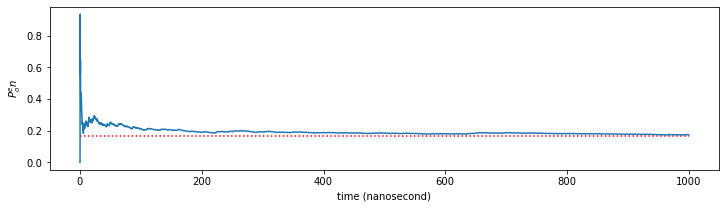

In [42]:
plt.figure(figsize=(12,3))
plt.plot(reporter['time'].in_units_of(unit.nanoseconds), Pe_on_in_time)
plt.hlines(Pe_on_teorico,0,1000, linestyle=':', color='red')
plt.ylabel('$P^e_on$'.format(reporter['coordinates'].unit))
plt.xlabel('time ({})'.format(unit.nanoseconds))
plt.show()

De hecho... podemos corroborar que la densidad de probabilidad sobre sobre el eje $X$ calculada teóricamente y la recogida de la simulación de la dinámica de Langevin son las mismas:

In [43]:
def occupation_probability_density_1d(traj_x, x_range, n_bins):
    delta_x = (x_range[1]-x_range[0])/n_bins
    frequency = np.zeros(n_bins, dtype=int)
    for x in traj_x:
        bin_visited = int((x-x_range[0])/delta_x)
        frequency[bin_visited]+=1
    x_bins_centers = (x_range[0]+0.5*delta_x) + delta_x*np.arange(n_bins)
    bins_probability_density = (1.0/delta_x)*(frequency/frequency.sum())
    return x_bins_centers, bins_probability_density

In [44]:
traj_x = reporter['coordinates'][:,0,0]
x_center_bin, px = occupation_probability_density_1d(traj_x, [-1,1]*unit.nanometers, 100)

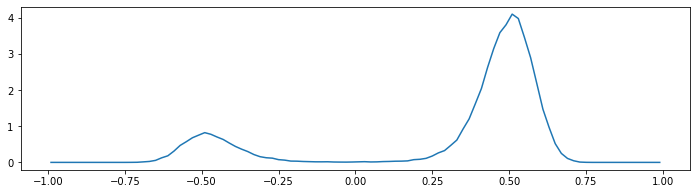

In [47]:
plt.figure(figsize=[12,3])
plt.plot(x_center_bin, px)

plt.show()

Porque también podemos preguntarnos ¿cuán más probable es el $2$ que el $3$? En este caso nos estamos preguntando por la probabilidad relativa de $2$ con respecto a $3$, y podemos


## ¿Y qué es la energía libre y cúal es su relación con la probabilidad?


## Ya podemos calcular el valor esperado de los observables que no dependen del tiempo

posición promedio, la energía cinética y la energía potencial promedio.


### Pero nuestro doble pozo era tridimensional.

Demostrar que lo que sucede en Y y Z no tiene nada que ver con X. Hay observables que si dependeran de la dimensionalidad, como por ejemplo la energía cinética.

\begin{equation}
Z = \int_{\vec_{r}} \int_{\vec_{v}} \, d\vec{r} d\vec{v}
\end{equation}

\begin{equation}
\int_{\vec_{r}} x dx
\end{equation}

In [ ]:
Z = \int_{\vec_{r}} \int_{\vec_{v}} e^{-\frac{1}{K_{B}T} U(\vec{r},\vec{v})} d\vec{r} d\vec{v}


Conocida la termodinámica del sistema, podemos predecir el valor de cualquier observable, o el resultado de cualquier experimento, que no dependa del tiempo.

La probabilidad de que los observables tomen un cierto valor depende de las energías potenciales y cinéticas de los estados del sistema compatibles con dicho valor del observable. Es por eso que hablamos de termodinámica cuando nos referimos a medidas y observables de magnitudes del equilibrio, que no dependen del tiempo.